In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = 'C:\\Users\\LENOVO\\Downloads\\Datasets\\DecesionTree\\salaries.csv'
df = pd.read_csv(path)
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [18]:
# X_train = df.drop(['salary_more_then_100k'],axis=1)
# X_train

In [19]:
# y_train = df['salary_more_then_100k']
# y_train

In [21]:
# # Now as we know machine learning model always works on numerical data so

# from sklearn.preprocessing import LabelEncoder
# le_company = LabelEncoder()
# le_job = LabelEncoder()
# le_degree = LabelEncoder()




In [22]:
# X_train['company_new'] = le_company.fit_transform(X_train['company'])

# X_train['job_new'] = le_job.fit_transform(X_train['job'])

# X_train['degree_new'] = le_degree.fit_transform(X_train['degree'])



In [23]:
# X_train_new = X_train.drop(['company','job','degree'],axis='columns')
# X_train_new

In [24]:
# from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier()

# model.fit(X_train_new,y_train)

In [25]:
# model.score(X_train_new,y_train)

In [26]:
# model.predict([[2,1,1]])
#Is salary of Google, Computer Engineer, Masters degree > 100 k ?

In [27]:
# model.predict([[1,2,1]]) means that in facebook(1) having job(business manager) and a degree(bachelors) will predict that he will have a salary greater than 100k

In [28]:
# Lets try out another way

X = df.drop(['salary_more_then_100k'],axis=1)

In [29]:
y = df.salary_more_then_100k

In [31]:
# Now labelEncoding because ml models only works on numeric data
from sklearn.preprocessing import LabelEncoder
#as we have to encode each independent variable so for each we will encode 
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [32]:
X['company_new'] = le_company.fit_transform(X['company'])
X['job_new'] = le_company.fit_transform(X['job'])
X['degree_new'] = le_company.fit_transform(X['degree'])

In [33]:
X

,company,job,degree,company_new,job_new,degree_new
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [36]:
x = X.drop(['company','job','degree'],axis=1)
x

,company_new,job_new,degree_new
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
y_predicted = model.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[0, 1],
       [0, 3]], dtype=int64)

Text(24.0, 0.5, 'actual')

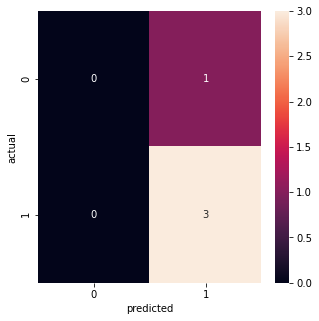

In [50]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

In [51]:
model.score(X_test,y_test)

0.75